In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [2]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

In [3]:
len(tfds.list_builders())

278

In [4]:
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)

print(ds)

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [5]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)
for image, label in ds:
    print(image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


In [6]:
ds = tfds.load('mnist', split='train')
ds = ds.batch(32).prefetch(1)

tfds.benchmark(ds, batch_size=32)
tfds.benchmark(ds, batch_size=32)  # 由于自动缓存，第二次 epoch 会快很多

  0%|          | 1/1875 [00:00<?, ?it/s]


************ Summary ************

Examples/sec (First included) 69737.87 ex/sec (total: 60000 ex, 0.86 sec)
Examples/sec (First only) 1306.53 ex/sec (total: 32 ex, 0.02 sec)
Examples/sec (First excluded) 71743.02 ex/sec (total: 59968 ex, 0.84 sec)


  0%|          | 1/1875 [00:00<?, ?it/s]


************ Summary ************

Examples/sec (First included) 303431.66 ex/sec (total: 60000 ex, 0.20 sec)
Examples/sec (First only) 2565.71 ex/sec (total: 32 ex, 0.01 sec)
Examples/sec (First excluded) 323686.12 ex/sec (total: 59968 ex, 0.19 sec)


,duration,num_examples,avg
first+lasts,0.197738,60000,303431.660363
first,0.012472,32,2565.706130
lasts,0.185266,59968,323686.118169


In [8]:
ds, info = tfds.load('mnist', split='train', with_info=True)
tfds.as_dataframe(ds.take(4), info)

,image,label
0,,4
1,,1
2,,0
3,,7


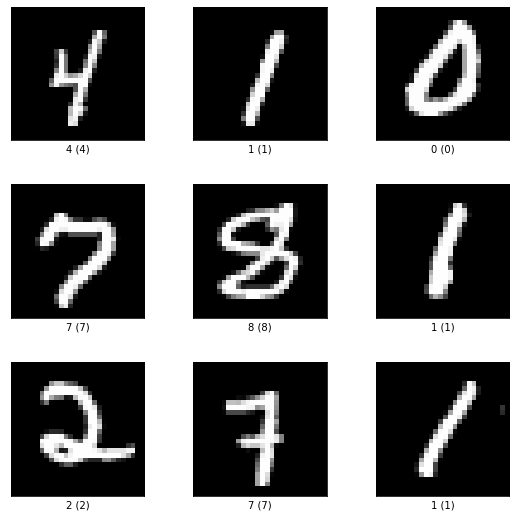

In [9]:
ds, info = tfds.load('mnist', split='train', with_info=True)

fig = tfds.show_examples(ds, info)

In [10]:
ds, info = tfds.load('mnist', with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\happy\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


In [11]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [12]:
print(info.features["label"].num_classes)
print(info.features["label"].names)
print(info.features["label"].int2str(7))  # Human readable version (8 -> 'cat')
print(info.features["label"].str2int('7'))

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
7
7


In [13]:
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].dtype)

{'image': (28, 28, 1), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(28, 28, 1)
<dtype: 'uint8'>


In [14]:
print(info.splits)

{'train': <SplitInfo num_examples=60000, num_shards=1>, 'test': <SplitInfo num_examples=10000, num_shards=1>}


In [15]:
print(info.splits['train'].num_examples)
print(info.splits['train'].filenames)
print(info.splits['train'].num_shards)

60000
['mnist-train.tfrecord-00000-of-00001']
1


In [16]:
print(info.splits['train[15%:75%]'].num_examples)
print(info.splits['train[15%:75%]'].file_instructions)

36000
[FileInstruction(filename='mnist-train.tfrecord-00000-of-00001', skip=9000, take=36000, num_examples=36000)]
